In [7]:
from astroML import stats as astroMLstats

def bins_num (X) :

    sigmaG2 = astroMLstats.sigmaG(X) # quantile at 75 - quantile at 25
    binsize = 2.7 * sigmaG2 / (len(X)**(1/3)) #Freedman-Diaconis
    N = (max(X) - min(X))/binsize

    return int(N+2)

Istogramma dei dati 

/tmp/ipykernel_13250/195771054.py:9: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return int(N+2)


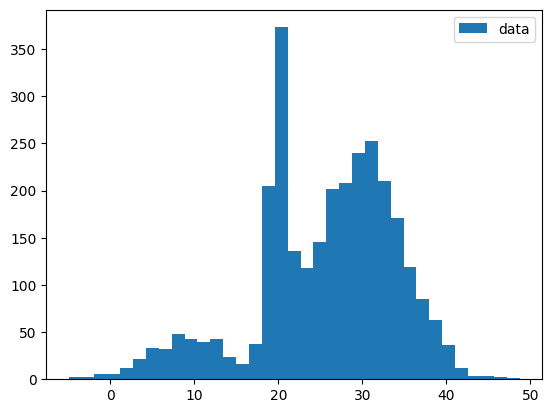

In [8]:
import numpy as np
from matplotlib import pyplot as plt
import sklearn

data = np.load("formationchannels.npy")

bins = bins_num(data)

plt.hist(data, bins, label = "data")
plt.legend()
plt.show()

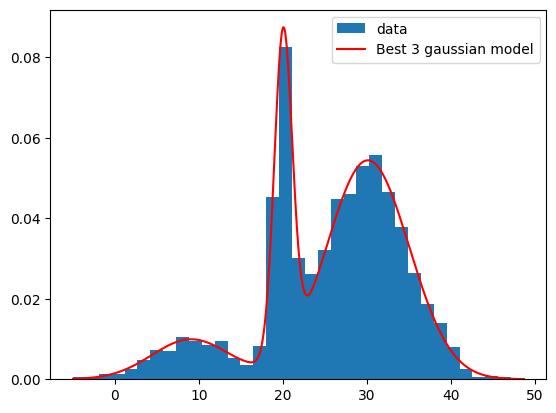

In [9]:
gm = sklearn.mixture.GaussianMixture(n_components=3, random_state=42) # define a 3 gaussian model
gm.fit(data)    #find the best 3 gaussian that fit the data

x = np.linspace(data.min(), data.max(), 1000).reshape(-1,1) #reshape is us to put in "vertical" the array
pdf = np.exp(gm.score_samples(x)) 
#score_sample gave us the log likelihood for each point, I could use score, that gave the result for the entire model and not for each point

plt.hist(data, bins, density=True, label ="data") #normalizzation, because same is the model
plt.plot(x,pdf, color = "red", label = "Best 3 gaussian model")
plt.legend()
plt.show()

AIC (Akaike Information Criterion) and BIC (Bayesian Information Criterion) are two criteria used to compare statistical models and choose the best one. They are particularly useful in the context of Gaussian Mixture Models (GMMs) to determine the optimal number of components (Gaussians).

AIC balances the goodness of fit of the model (likelihood) and its complexity. Models with more parameters may fit the data better but are at risk of overfitting.

BIC is similar to AIC but penalizes complexity more heavily. BIC includes a term that increases with the amount of data, so it tends to favor simpler models compared to AIC, especially when the dataset is large.

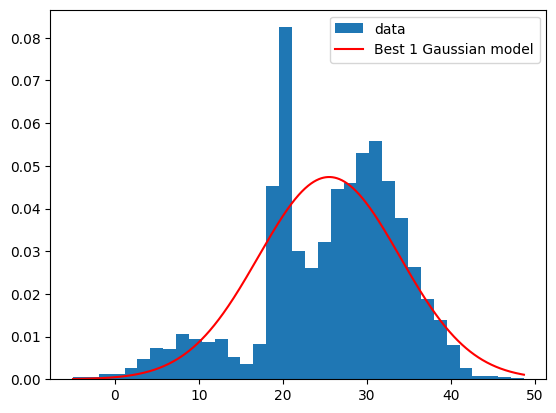

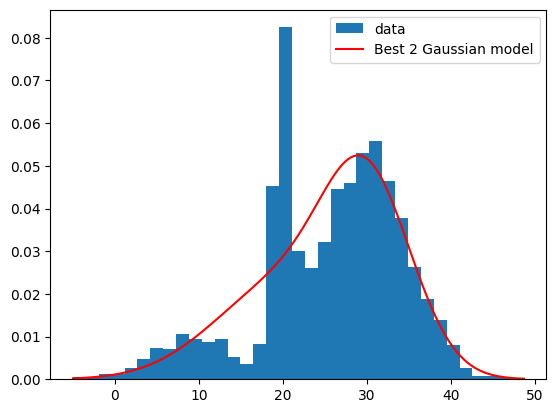

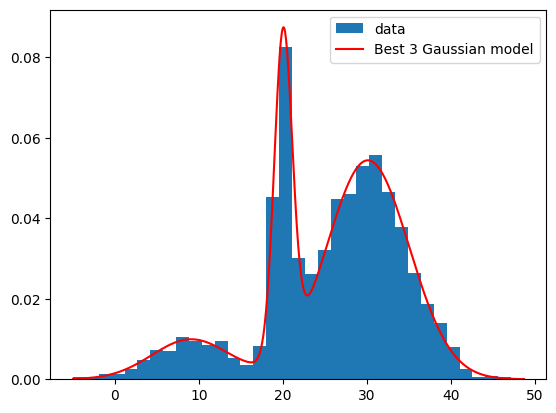

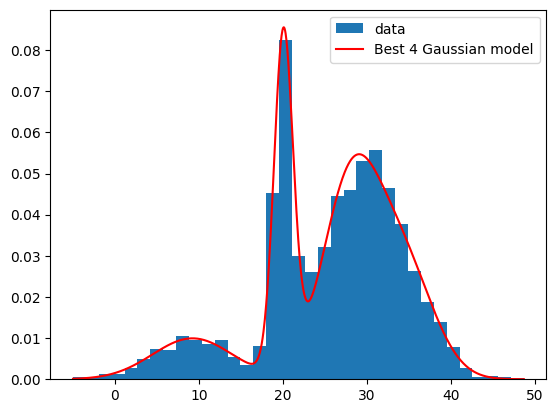

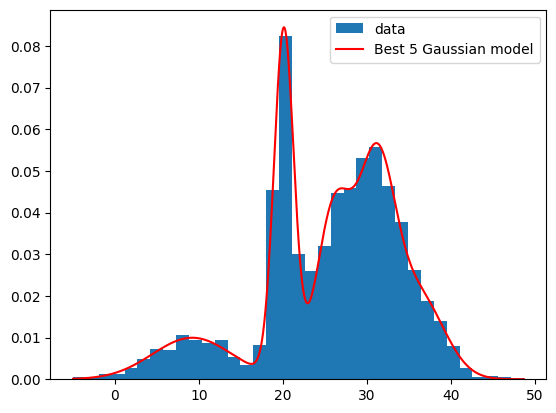

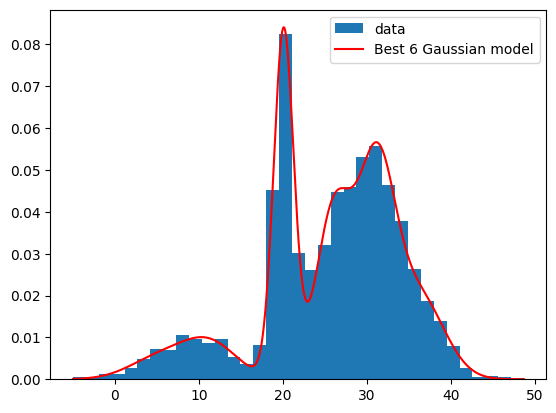

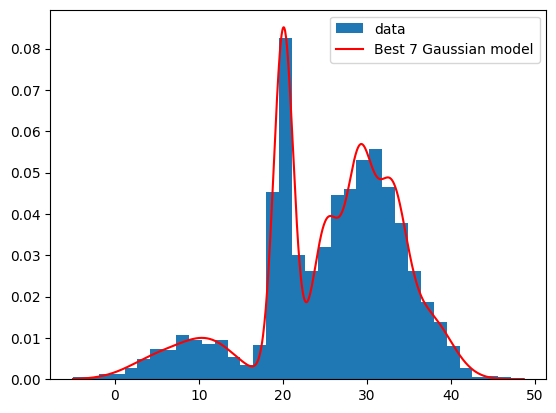

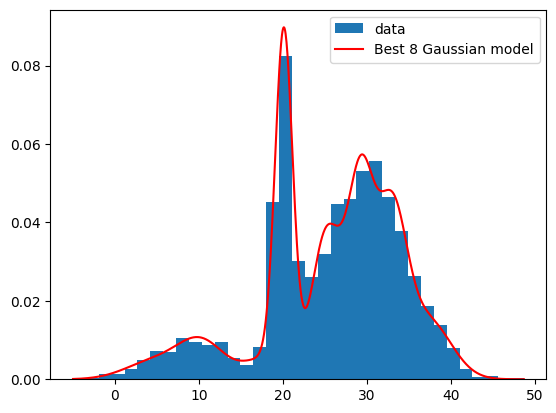

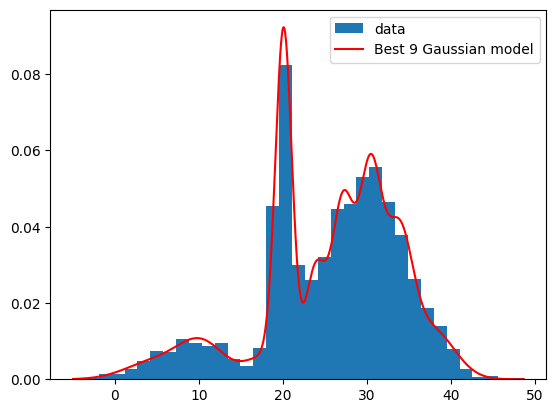

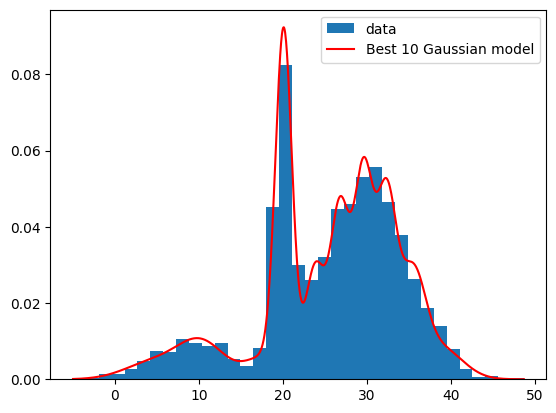

In [ ]:
AIC = []
BIC = []

for i in range(10): #as before but with a  i+1 gaussian model
    gm = sklearn.mixture.GaussianMixture(n_components=i+1, random_state=42)

    gm.fit(data)

    x = np.linspace(data.min(), data.max(), 1000).reshape(-1,1)
    pdf = np.exp(gm.score_samples(x)) 
    
    plt.hist(data, bins, density=True, label = "data")
    plt.plot(x, pdf, color="red", label="Best " + str(i+1) + " Gaussian model")

    AIC.append(gm.aic(data)) #save fit AIC and BIC
    BIC.append(gm.bic(data))

    plt.legend()

    plt.show()
    plt.close()

    #MAGARI AGGIUNGERE IL CHI QUADRO RIDOTTO

Plot of AIC and BIC by varing the number of gaussian

Optimal number of Gaussians from AIC: 3
Optimal number of Gaussians from BIC: 3


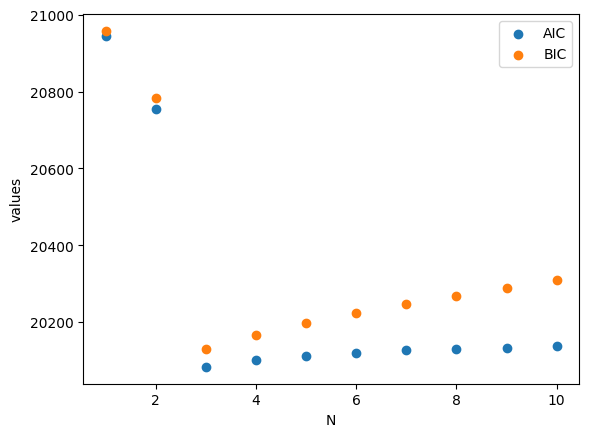

In [13]:
plt.scatter(range(1,11), AIC, label ="AIC")
plt.scatter(range(1,11), BIC , label ="BIC")
plt.xlabel("N")
plt.ylabel("values")
plt.legend()

best_n_AIC = np.argmin(AIC) + 1  # +1 because the index starts from 0
print(f"Optimal number of Gaussians from AIC: {best_n_AIC}")
best_n_BIC = np.argmin(BIC) + 1
print(f"Optimal number of Gaussians from BIC: {best_n_BIC}")


plt.show()

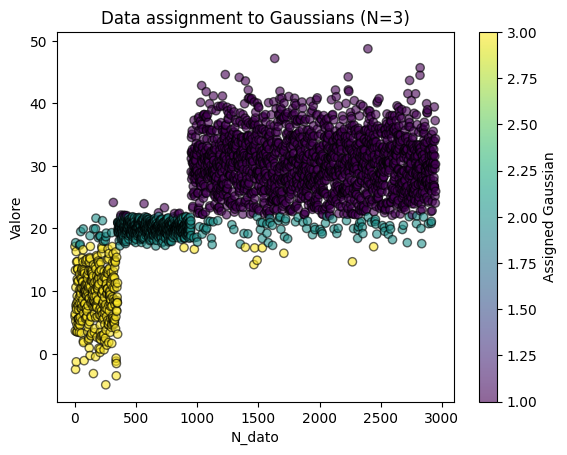

In [14]:
Number_gauss = 3 #number of gaussian for the mixture

gm = sklearn.mixture.GaussianMixture(n_components=Number_gauss, random_state=42)
gm.fit(data)

# Prediction of cluster assegnation
labels = gm.predict(data)

# Plot color data of appartenention
plt.scatter(range(len(data)), data, c=labels + 1, cmap="viridis", alpha=0.6, edgecolor="k")
plt.xlabel("N_dato")
plt.ylabel("Valore")
plt.title(f"Data assignment to Gaussians (N={Number_gauss})")
plt.colorbar(label="Assigned Gaussian")
plt.show()
